Plotting column 5...
Optimal parameters: [3.08886630e-01 1.24844027e+10 8.28704910e+05]
Lower: 12483413569.269249
Upper: 12485317971.860369
Done!


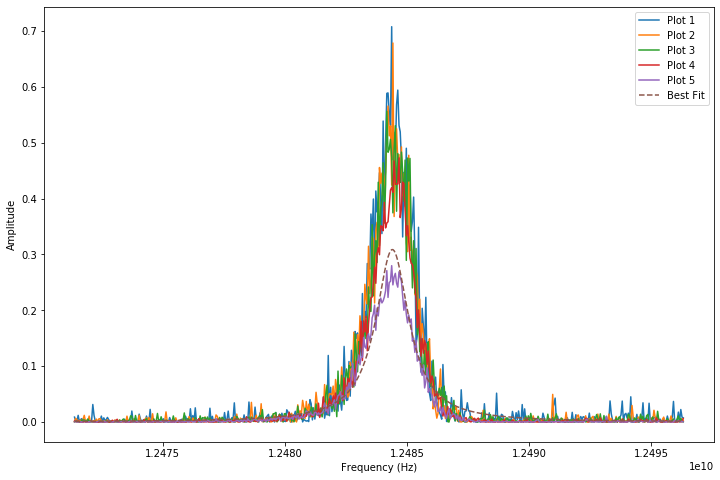

In [7]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline


# this function is the curve we wish to fit
# along with its relevant parameters
def gaussian(x, a, x0, sigma):
    """
    a is the amplitude
    x0 is the mean
    sigma is the standard deviation
    """
    return a * np.exp(-(x-x0)**2/(2*sigma**2))

def lorentzian( x, a, x0, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)


def graph(filename, name):

    # load the data
    df = pd.read_csv(filename, header=None, skiprows=[0])
    df = df.to_numpy()

    X = df[:, 0]
    Y = df[:, 1:]**2

    # plot the raw data
    fig, ax = plt.subplots(figsize=(12, 8))

    for col in range(Y.shape[1]):

        # columns to skip
        if col+1 in [6, 7, 8]:
            continue

        print(f"Plotting column {col+1}...", end='\r')
        ax.plot(X, Y[:, col], label=f"Plot {col+1}")

    # produce a guess for your parameters
    # NOTE manual guesses are better!
    # curve_fit will then fine tune the values
    mean = 1.2484e10
    std = 1.5e5

    # Gaussian best fit
    Y_hat = np.mean(Y, axis=1)

    # NOTE check out the documentation for curve_fit, its helpful
    opt, _ = curve_fit(lorentzian, X, Y_hat, p0=[1, mean, std])

    print("\nOptimal parameters:", opt)

    # plot the best fit
    ax.plot(X, lorentzian(X, *opt), label=f"Best Fit", linestyle='--')

    # FWHM
    S = Y.sum(axis=1)

    spline = UnivariateSpline(X, S-np.max(S)/2, s=0)
    r = spline.roots()  # find the roots
    r1, r2 = r[0], r[-1]
    print(f"Lower: {r1}\nUpper: {r2}")

#     plt.axvline(x=r1, color='g', linestyle="--", alpha=0.5)
#     plt.axvline(x=r2, color='g', linestyle="--", alpha=0.5)


    # graph labelling
    plt.legend()
    

    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")

    plt.savefig(f"{name}.png")
    print("Done!")


if __name__ == "__main__":
    graph("Qubit data(amplitude).csv", name="Amplitudes")
